In [3]:
import contextily as ctx
import matplotlib.pyplot as plt
import breizhcrops as bzh
import seaborn as sns
import datetime
import tqdm
import numpy as np
import pandas as pd
import geopandas as gpd
from breizhcrops import BreizhCrops
from breizhcrops.datasets.breizhcrops import BANDS as allbands

In [2]:
"""
bzh.BreizhCrops(region,
                root="breizhcrops_dataset",
                year=2017, level="L1C",
                transform=None,
                target_transform=None,
                filter_length=0,
                verbose=False,
                load_timeseries=True,
                recompile_h5_from_csv=False,
                preload_ram=False)


:param region: dataset region. choose from "frh01", "frh02", "frh03", "frh04", "belle-ile"
:param root: where the data will be stored. defaults to `./breizhcrops_dataset`
:param year: year of the data. currently only `2017`
:param level: Sentinel 2 processing level. Either `L1C` (top of atmosphere) or `L2A` (bottom of atmosphere)
:param transform: a transformation function applied to the raw data before retrieving a sample. Can be used for featured extraction or data augmentaiton
:param target_transform: a transformation function applied to the label.
:param filter_length: time series shorter than `filter_length` will be ignored
:param bool verbose: verbosity flag
:param bool load_timeseries: if False, no time series data will be loaded. Only index file and class initialization. Used mostly for tests
:param bool recompile_h5_from_csv: downloads raw csv files and recompiles the h5 databases. Only required when dealing with new datasets
:param bool preload_ram: loads all time series data in RAM at initialization. Can speed up training if data is stored on HDD.
"""

'\nbzh.BreizhCrops(region,\n                root="breizhcrops_dataset",\n                year=2017, level="L1C",\n                transform=None,\n                target_transform=None,\n                filter_length=0,\n                verbose=False,\n                load_timeseries=True,\n                recompile_h5_from_csv=False,\n                preload_ram=False)\n\n\n:param region: dataset region. choose from "frh01", "frh02", "frh03", "frh04", "belle-ile"\n:param root: where the data will be stored. defaults to `./breizhcrops_dataset`\n:param year: year of the data. currently only `2017`\n:param level: Sentinel 2 processing level. Either `L1C` (top of atmosphere) or `L2A` (bottom of atmosphere)\n:param transform: a transformation function applied to the raw data before retrieving a sample. Can be used for featured extraction or data augmentaiton\n:param target_transform: a transformation function applied to the label.\n:param filter_length: time series shorter than `filter_len

In [4]:
dataset = bzh.BreizhCrops("frh04")

In [5]:
dataset.index

id CODE_CULTU                   path     meanCLD  sequencelength  \
idx                                                                             
0       6017564        PTR  csv/frh04/6017564.csv  780.075742             102   
6       6054675        PTR  csv/frh04/6054675.csv  731.428571              49   
7       6018665        PTR  csv/frh04/6018665.csv  710.530612              49   
8       6019318        PTR  csv/frh04/6019318.csv  770.534653             101   
9       6019435        RGA  csv/frh04/6019435.csv  600.625715              49   
...         ...        ...                    ...         ...             ...   
158327  5057907        PPH  csv/frh04/5057907.csv  633.608050              50   
158328  5057908        MIS  csv/frh04/5057908.csv  640.096150              50   
158330  5057910        MIS  csv/frh04/5057910.csv  662.517416              50   
158331  5057975        MIS  csv/frh04/5057975.csv  639.764726              50   
158332  5057976        MIS  csv/frh04/5057976.csv  648.850241              50   

        classid          classname region  
idx                                        
0             8  temporary meadows  frh04  
6             8  temporary meadows  frh04  
7             8  temporary meadows  frh04  
8             8  temporary meadows  frh04  
9             8  temporary meadows  frh04  
...         ...                ...    ...  
158327        7  permanent meadows  frh04  
158328        3               corn  frh04  
158330        3               corn  frh04  
158331        3               corn  frh04  
158332        3               corn  frh04  

[122614 rows x 8 columns]

In [6]:
# let's define identity transforms to avoid any preprocessing (we will see later)
def raw_transform(input_timeseries):
    return input_timeseries

belle_ile = bzh.BreizhCrops(region="belle-ile", transform=raw_transform)

print(f"length: {len(belle_ile)}")

dataset_index = 740 
time_series, label, field_id = belle_ile[dataset_index]

print(f"input data dimensions TxD {time_series.shape}")
print(f"label id {label} of class '{belle_ile.classname[label]}'")

length: 1049
input data dimensions TxD (101, 17)
label id 8 of class 'temporary meadows'


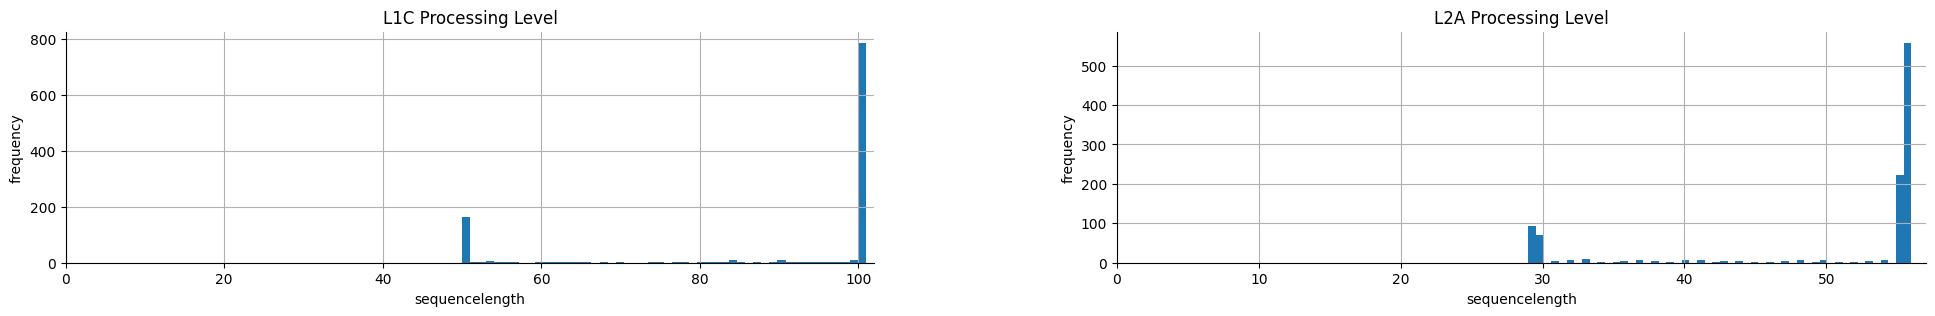

In [7]:
belle_ile_l1c = BreizhCrops(region="belle-ile", transform=raw_transform, level="L1C")
belle_ile_l2a = BreizhCrops(region="belle-ile", transform=raw_transform, level="L2A")

fig, axs = plt.subplots(1,2, figsize=(24,3))
ax=axs[0]
belle_ile_l1c.index.hist(column="sequencelength", bins=50, ax=ax)

ax.set_xlabel("sequencelength")
ax.set_ylabel("frequency")
ax.set_title("L1C Processing Level")
ax.set_xlim(0,102)

ax = axs[1]
belle_ile_l2a.index.hist(column="sequencelength", bins=50, ax=ax)
ax.set_xlabel("sequencelength")
ax.set_ylabel("frequency")
ax.set_title("L2A Processing Level")
ax.set_xlim(0,57)
sns.despine(fig)

In [8]:
belle_ile = bzh.BreizhCrops(region="belle-ile")
field_parcels_geodataframe = belle_ile.geodataframe()
field_parcels_geodataframe.head()

/home/roshan/.local/lib/python3.10/site-packages/breizhcrops/datasets/breizhcrops.py:218: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  geodataframe["geometry"] = geom["geometry"]


id  Unnamed: 0 CODE_CULTU                   path     meanCLD  \
0  6059869        8657        PPH  csv/frh04/6059869.csv  593.920000   
1  6028960       11515        PRL  csv/frh04/6028960.csv  721.857814   
2  6028961       11517        PRL  csv/frh04/6028961.csv  673.893974   
3  6028962       11518        PPH  csv/frh04/6028962.csv  682.501811   
4  6028965       11521        VRG  csv/frh04/6028965.csv  679.287129   

   sequencelength  classid          classname     region  \
0              50        7  permanent meadows  belle-ile   
1              95        7  permanent meadows  belle-ile   
2             101        7  permanent meadows  belle-ile   
3             101        7  permanent meadows  belle-ile   
4             101        5           orchards  belle-ile   

                                            geometry  
0  POLYGON ((239743.748 6705781.145, 239799.117 6...  
1  POLYGON ((236216.398 6710031.991, 236218.568 6...  
2  POLYGON ((235999.803 6710197.616, 236048.784 6...  
3  POLYGON ((235999.806 6710197.618, 235984.833 6...  
4  POLYGON ((235913.419 6710239.422, 235942.655 6...

In [22]:
field_parcels_geodataframe.to_csv('new.csv')

In [9]:
dataset.codes

Libellé Culture  Code Groupe Culture  \
Code Culture                                                                  
BTH                                 Blé tendre d'hiver                    1   
BTP                            Blé tendre de printemps                    1   
MID                                          Maïs doux                    2   
MIE                                      Maïs ensilage                    2   
MIS                                               Maïs                    2   
...                                                ...                  ...   
TBT                                 Tubercule tropical                   28   
TCR                          Taillis à courte rotation                   28   
TRU           Truffière (chênaie de plants mycorhizés)                   28   
VET                                            Vétiver                   28   
ZZZ                                   Culture inconnue                   28   

              Libellé Groupe Culture  
Code Culture                          
BTH                       Blé tendre  
BTP                       Blé tendre  
MID           Maïs grain et ensilage  
MIE           Maïs grain et ensilage  
MIS           Maïs grain et ensilage  
...                              ...  
TBT                           Divers  
TCR                           Divers  
TRU                           Divers  
VET                           Divers  
ZZZ                           Divers  

[328 rows x 3 columns]

In [10]:
dataset.mapping

id          classname
code                       
ORH    0             barley
ORP    0             barley
BTH    1              wheat
BTP    1              wheat
CZH    2           rapeseed
CZP    2           rapeseed
MID    3               corn
MIE    3               corn
MIS    3               corn
TRN    4          sunflower
VRG    5           orchards
PWT    5           orchards
PFR    5           orchards
AGR    5           orchards
CAB    6               nuts
CTG    6               nuts
NOS    6               nuts
NOX    6               nuts
PIS    6               nuts
PPH    7  permanent meadows
PRL    7  permanent meadows
PTR    8  temporary meadows
RGA    8  temporary meadows

In [11]:
# initialize datasets at both processing levels
datasets = dict(
    L1C=bzh.BreizhCrops(region="belle-ile", level="L1C", transform=raw_transform),
    L2A=bzh.BreizhCrops(region="belle-ile", level="L2A", transform=raw_transform)
)


In [12]:
def plot_sample(field_id, datasets):
    fig = plt.figure(figsize=(24,8), constrained_layout=False)
    gs = fig.add_gridspec(nrows=2, ncols=2)
  
    #### Left Plot ####
    #ax = axs[0] 
    ax = fig.add_subplot(gs[0, 0])
    dataset_index = (datasets["L1C"].index.id==field_id).argmax()
    x, y, field_id = datasets["L1C"][dataset_index]
    fig.suptitle(f"field id: {field_id} --- {datasets['L1C'].classname[y]}", fontsize=16, weight="bold")
    l1c_bands = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8','B8A', 'B9']
    bands_idxs = [allbands["L1C"].index(b) for b in l1c_bands]
    date_of_acquisition = pd.to_datetime(x[:, allbands["L1C"].index("doa")])
    time_series = x[:,bands_idxs]

    ax.plot(date_of_acquisition, time_series, "*-")
    ax.legend(l1c_bands, ncol=len(l1c_bands)//3)
    ax.set_title("processing level L1C")

    #### Center Plot ####
    #ax = axs[1]
    ax = fig.add_subplot(gs[1, 0])
    dataset_index = (datasets["L2A"].index.id==field_id).argmax()
    x, y, field_id = datasets["L2A"][dataset_index]
    l2a_bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
    bands_idxs = [allbands["L2A"].index(b) for b in l2a_bands]
    date_of_acquisition = pd.to_datetime(x[:, allbands["L2A"].index("doa")])
    time_series = x[:,bands_idxs]

    ax.plot(date_of_acquisition, time_series, "*-")
    ax.legend(l2a_bands, ncol=len(l2a_bands)//3)
    ax.set_title("processing level L2A")

    #### Right Plot ####
    #ax = axs[2] # right plot
    ax = fig.add_subplot(gs[:, 1])
    ax.axis("off")
    field_parcels_geodataframe.to_crs(epsg=3857).plot(ax=ax, color="lightblue")
    selected_field_geometry = field_parcels_geodataframe.to_crs(epsg=3857).loc[field_parcels_geodataframe.id==field_id]
    selected_field_geometry.plot(ax=ax, edgecolor="black", color="black")
    ax.set_title("location")

    sns.despine(fig)
    fig.tight_layout()

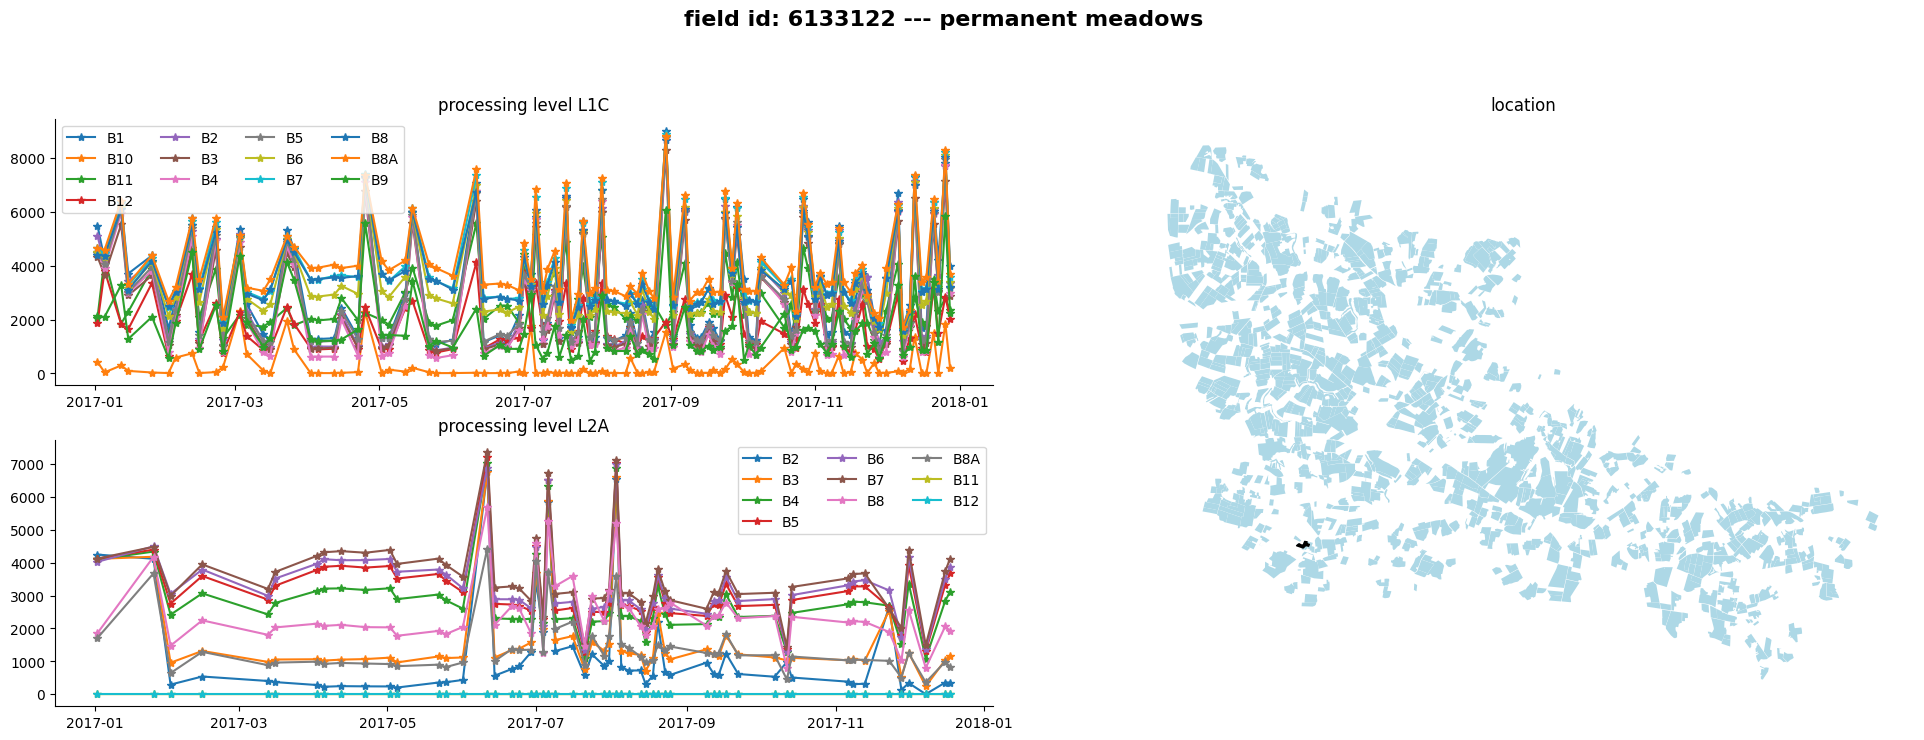

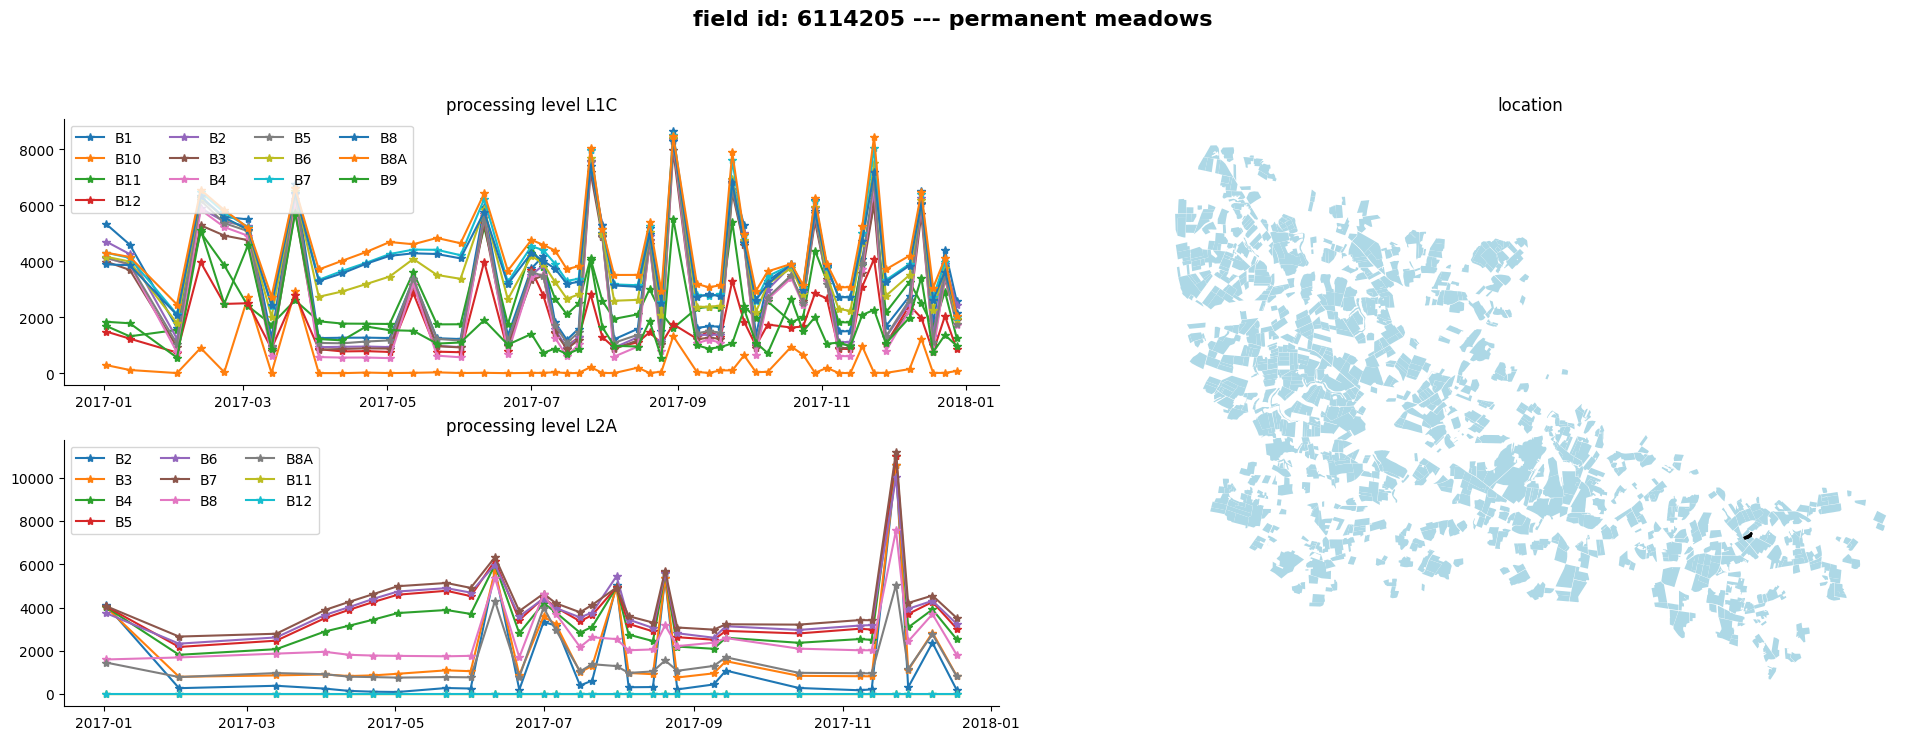

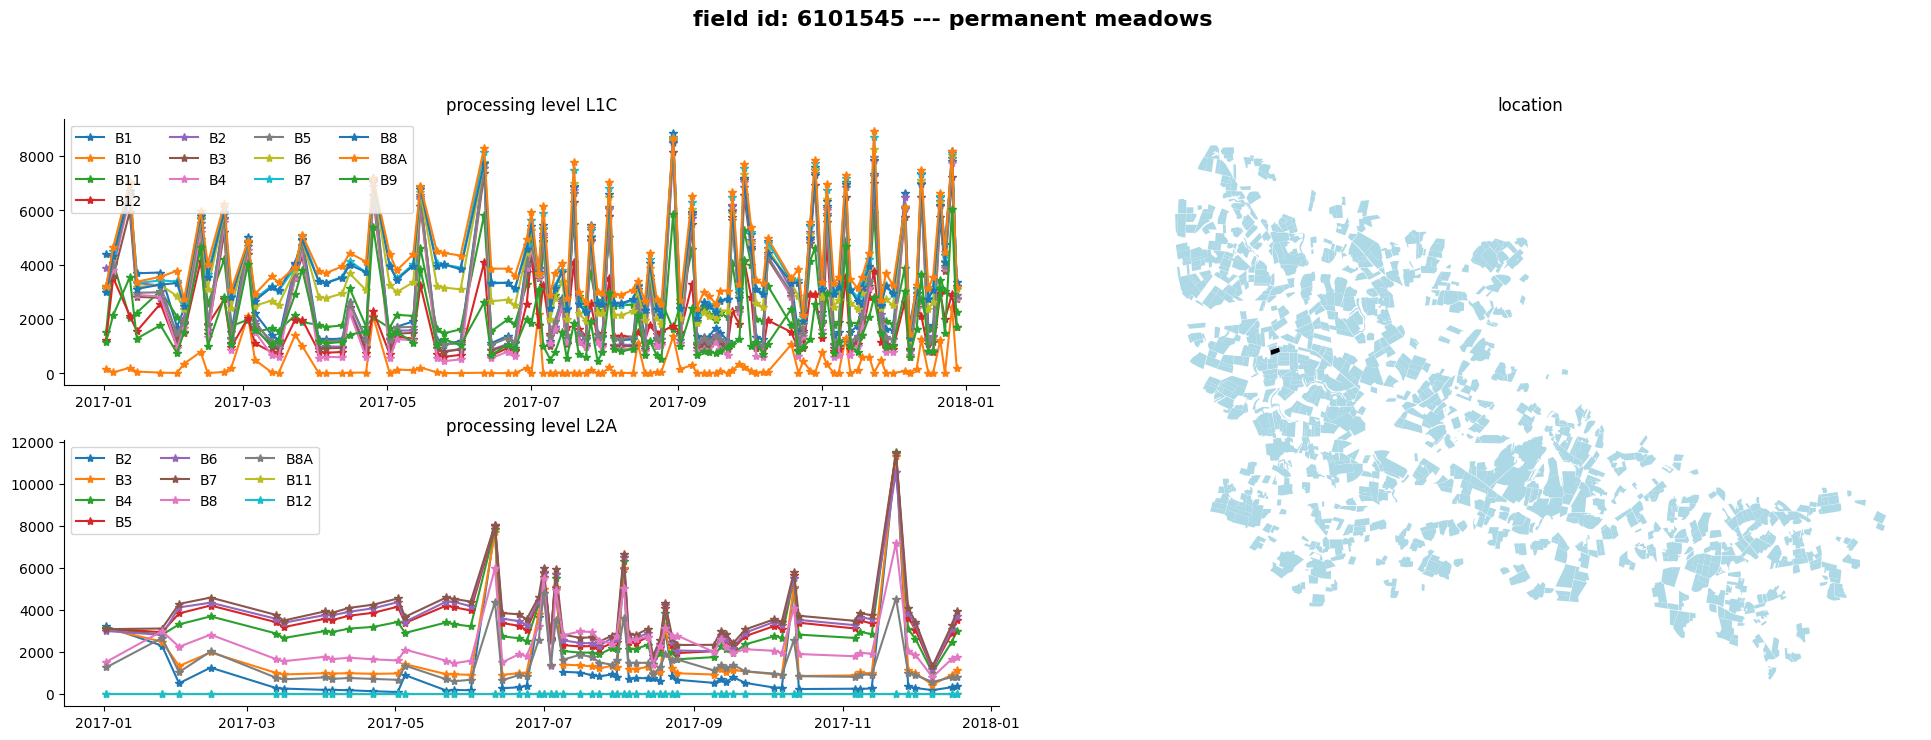

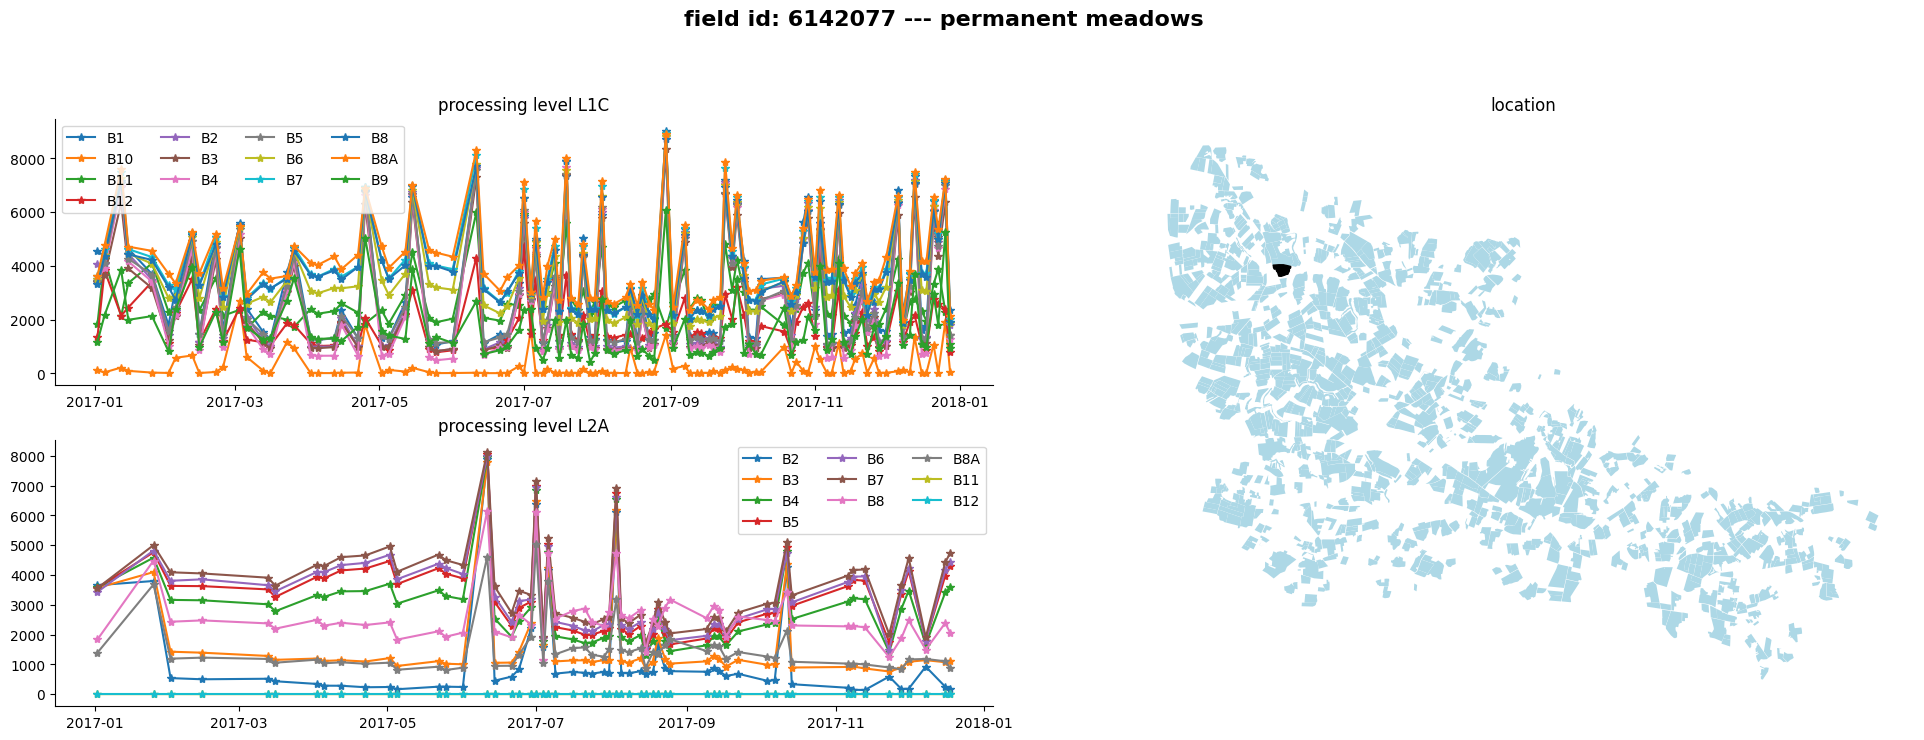

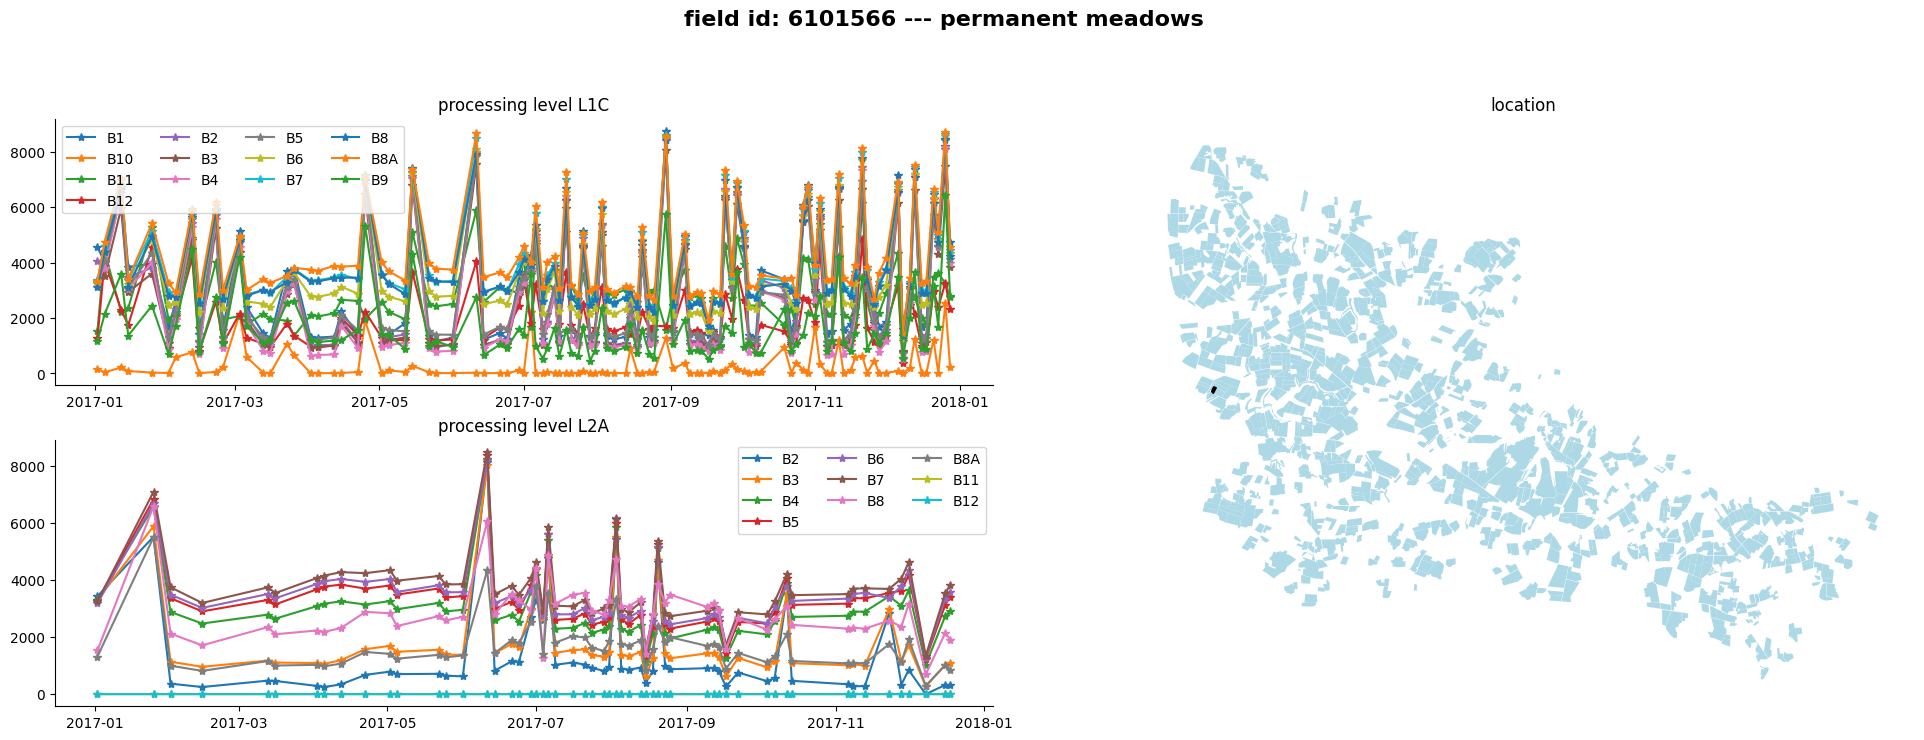

In [14]:
classname = "permanent meadows" # ['barley', 'wheat', 'corn', 'permanent meadows', 'temporary meadows']

mask = field_parcels_geodataframe.classname == classname
random_fields = field_parcels_geodataframe.loc[mask].sample(5).id.values

tb = [str(random_fields[i]) for i in range(len(random_fields))]
for i in range(len(random_fields)):
    plot_sample(random_fields[i], datasets)

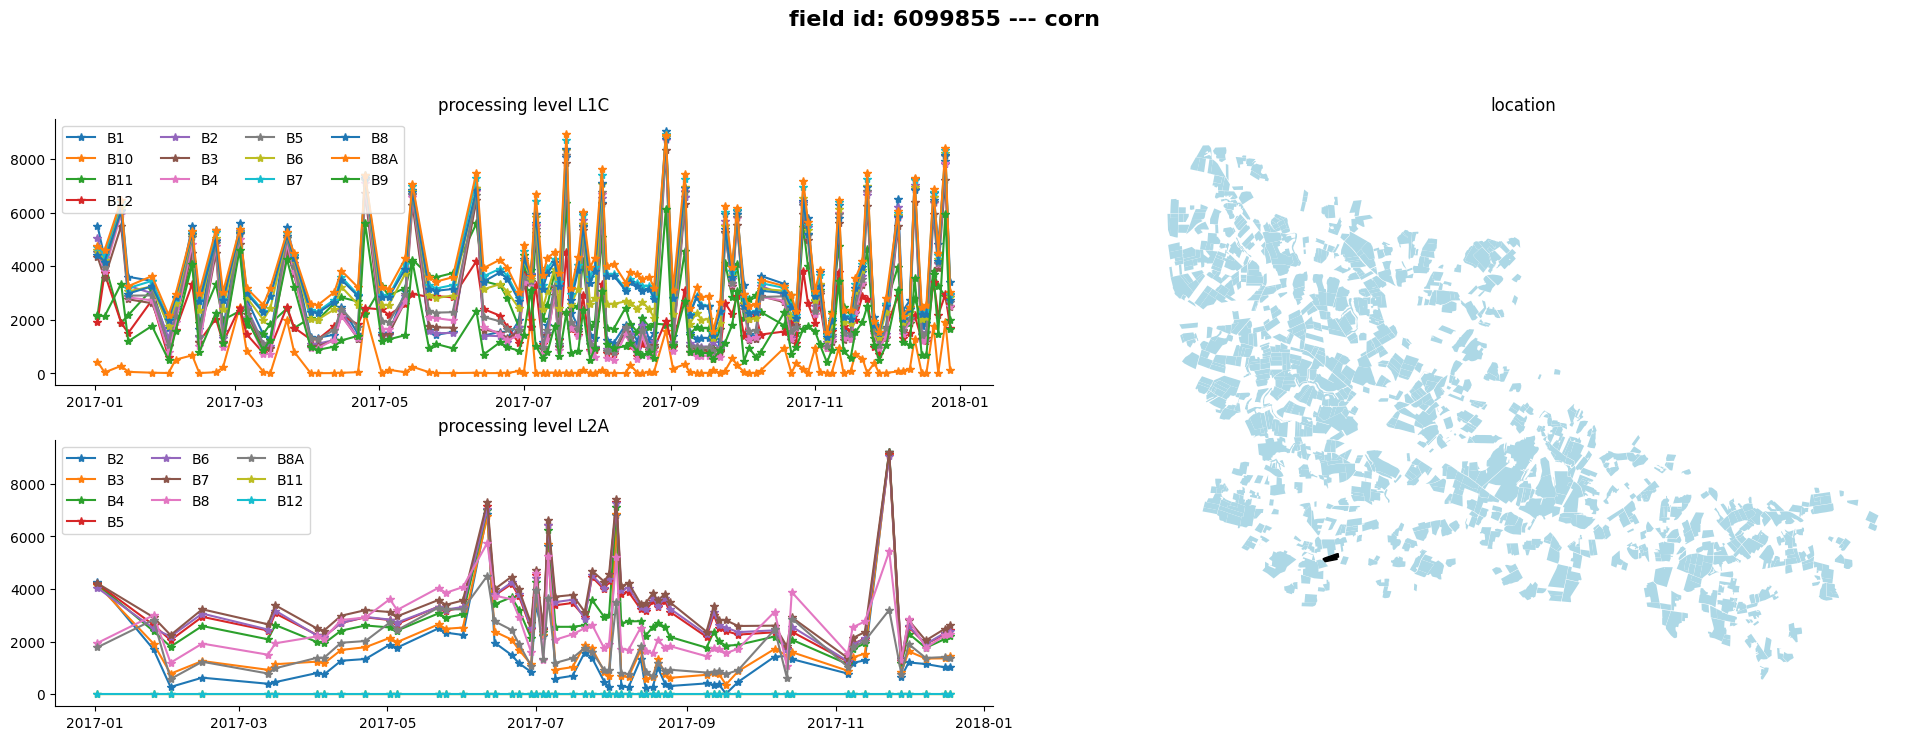

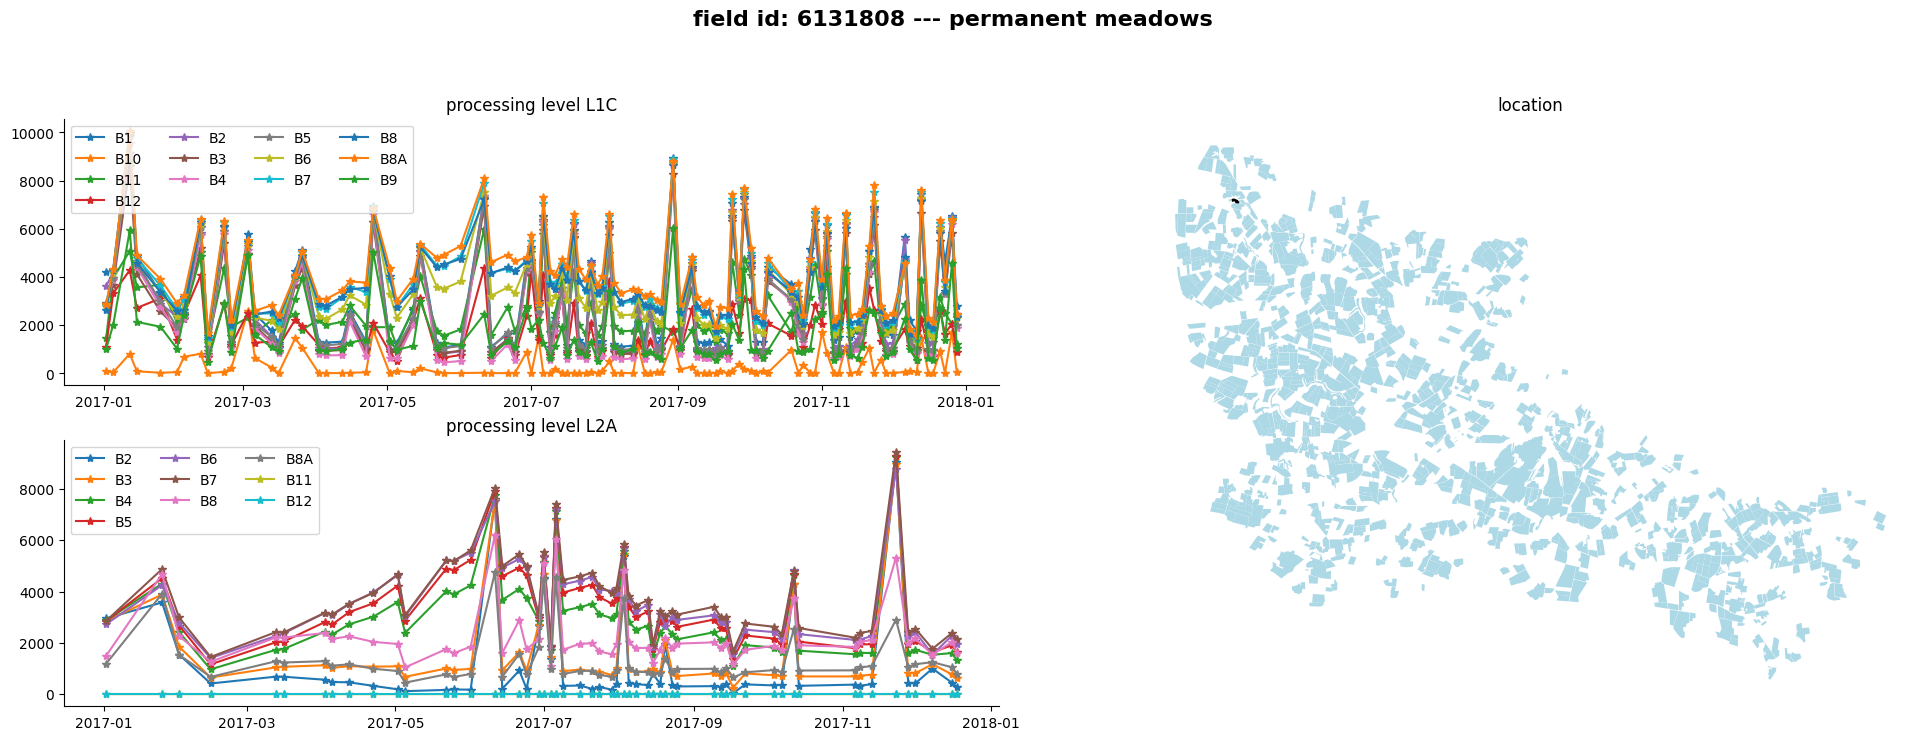

In [15]:
for classname in ['corn', 'permanent meadows']:
    mask = field_parcels_geodataframe.classname==classname
    if sum(mask) > 0:
        random_fields = field_parcels_geodataframe.loc[mask].sample(1).id.values[0]
        plot_sample(random_fields, datasets)

Text(0, 0.5, 'reflectance')

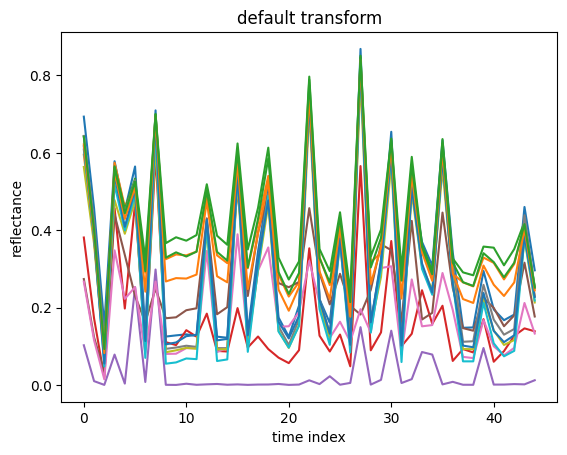

In [16]:
dataset = BreizhCrops(region="belle-ile")
x,y,field_id = dataset[0]
fig,ax = plt.subplots()
ax.plot(x)
ax.set_title("default transform")
ax.set_xlabel("time index")
ax.set_ylabel("reflectance")

Text(0.5, 1.0, 'NDVI')

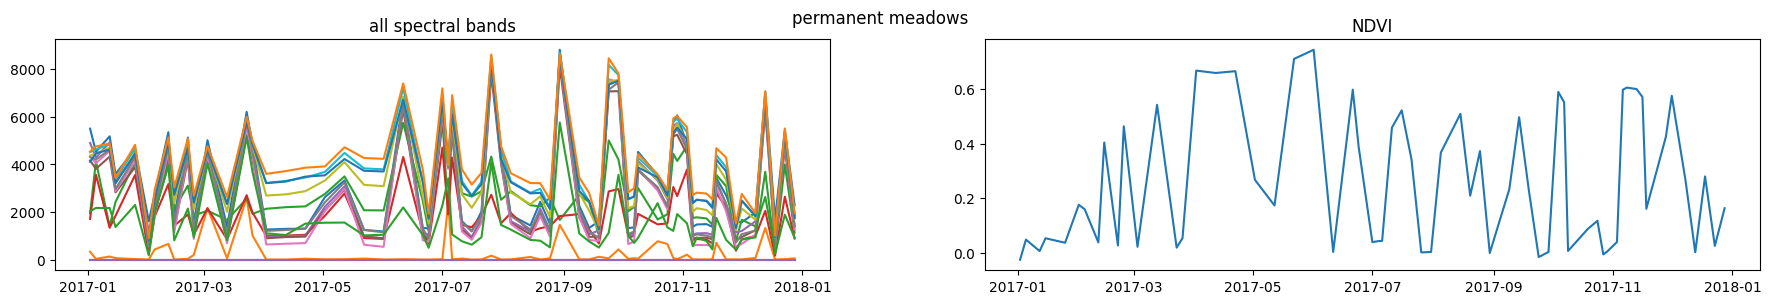

In [17]:
def calculate_ndvi(input_timeseries):
    bands = allbands["L1C"].copy()
    bands.remove('label')
    bands.remove('id')
    data = pd.DataFrame(input_timeseries,columns=bands)
    data["doa"] = pd.to_datetime(data["doa"])
    data = data.set_index("doa")
    l1c_bands = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 
               'B5', 'B6', 'B7', 'B8','B8A', 'B9']
    data[l1c_bands] *= 1e-4
    nir = data["B8"]#
    red = data["B4"]
    return (nir-red) / (nir+red+1e-8)


dataset_index = 94
fig,axs = plt.subplots(1,2, figsize=(22,3))
ax = axs[0]
regular_dataset = bzh.BreizhCrops(region="belle-ile", level="L1C", transform=raw_transform)
x,y,field_id = datasets["L1C"][dataset_index]
date = pd.to_datetime(x[:,-1])
x = x[:,:-1]
ax.plot(date,x[:,:-1])
ax.set_title("all spectral bands")

fig.suptitle(regular_dataset.classname[y])
ax = axs[1]

ndvi_dataset = bzh.BreizhCrops(region="belle-ile", level="L1C", transform=calculate_ndvi)
x,y,field_id = ndvi_dataset[dataset_index]
ax.plot(x)
ax.set_title("NDVI")

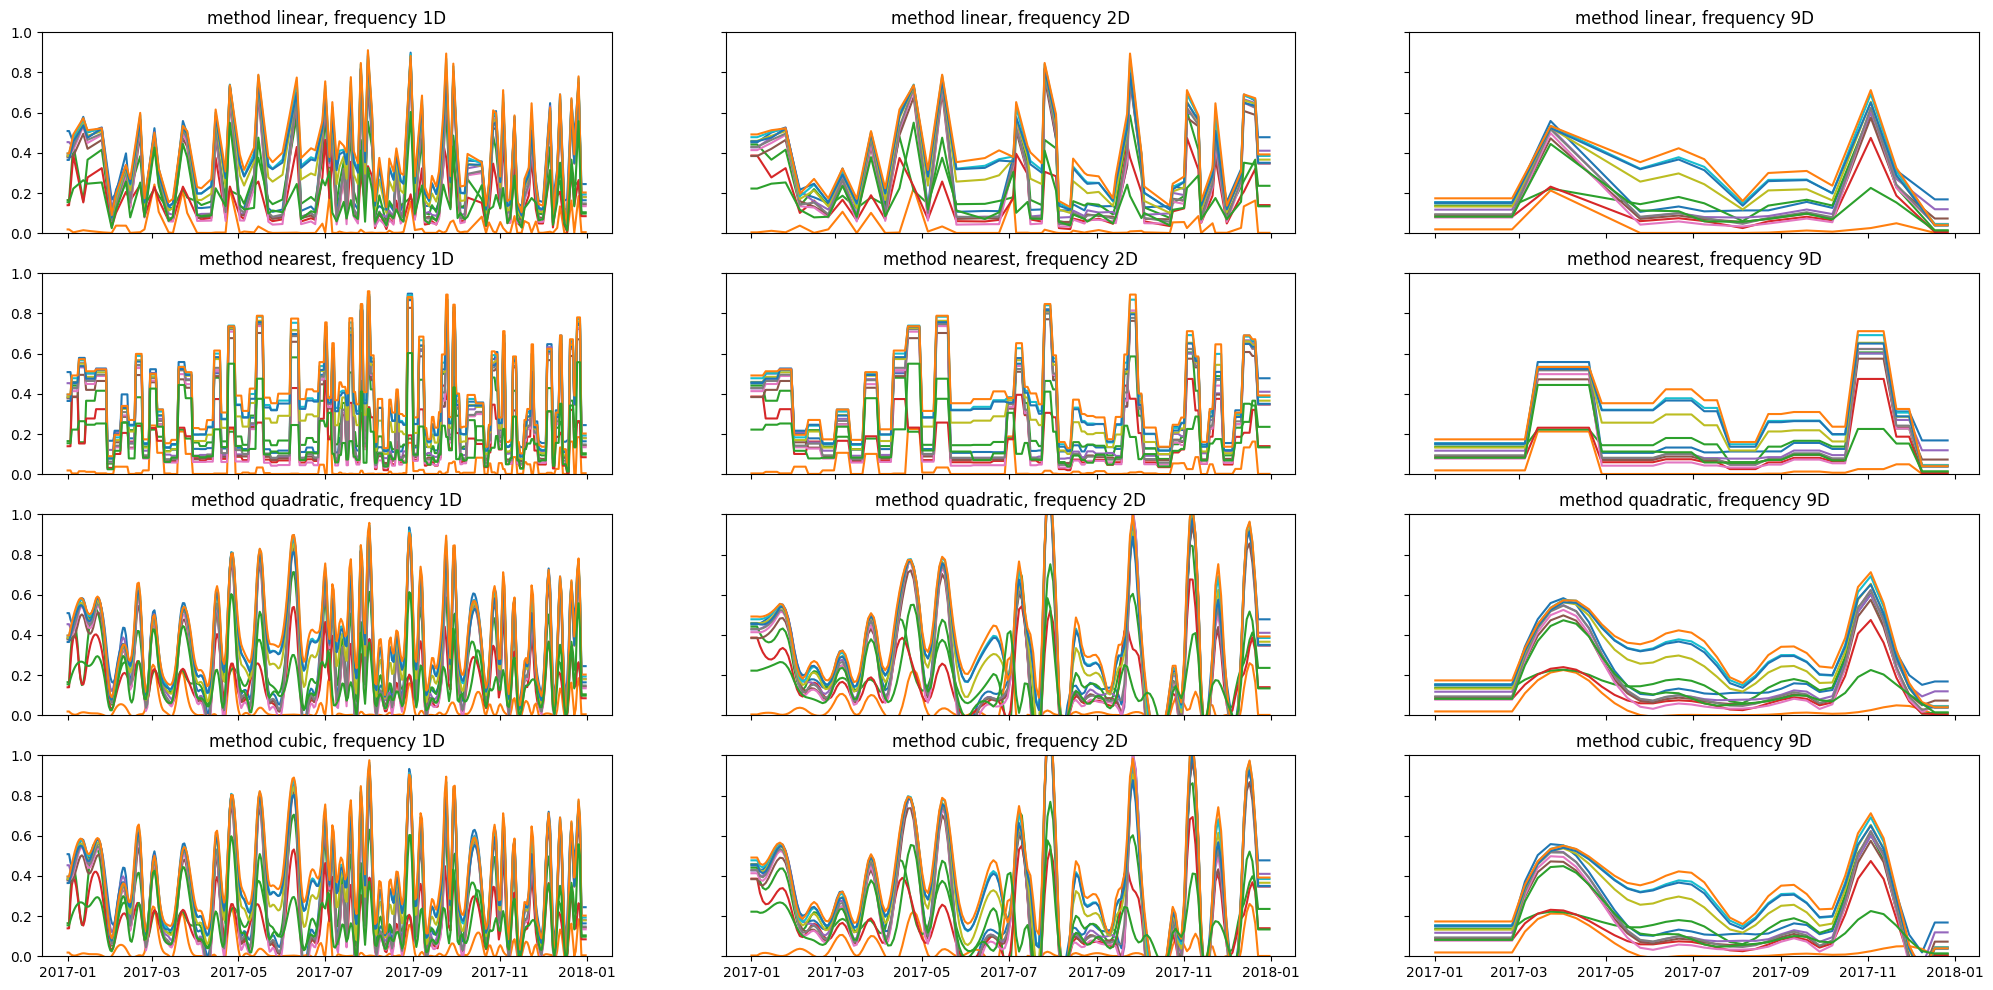

In [18]:
level = "L1C" # ["L1C", "L2A"]

if level == "L1C":
    selected_bands = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']
elif level == "L2A":
    selected_bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']

def get_interpolate_transform(interpolation_frequency, interpolation_method):

    def interpolate_transform(input_timeseries):
        #input_timeseries = raw_transform(input_timeseries)
        bands = allbands[level].copy()
        bands.remove('label')
        bands.remove('id')
        data = pd.DataFrame(input_timeseries, columns=bands)
        data["doa"] = pd.to_datetime(data["doa"])
        data = data.set_index("doa")
        data = data.reindex(pd.date_range(start=datetime.datetime(data.index[0].year,1,1),
                                    end=datetime.datetime(data.index[0].year,12,31),
                                    freq=interpolation_frequency))
        data = data.interpolate(method=interpolation_method)
        data = data.fillna(method="ffill").fillna(method="bfill")
        data = data[selected_bands] * 1e-4
        return data
    return interpolate_transform


frequencies = ["1D","2D","9D"]
methods = ["linear", "nearest", "quadratic", "cubic"]

fig, axs = plt.subplots(len(methods), len(frequencies), figsize=(25,12), sharex=True, sharey=True)
axs = iter(np.array(axs).reshape(-1))

for method in methods:
    for freq in frequencies:
        transform = get_interpolate_transform(freq, method)
        ds = bzh.BreizhCrops(region="belle-ile", level=level, transform=transform)
        x,y,i = ds[10]
        ax = next(axs)
        ax.set_ylim(0,1)
        ax.plot(x)
        ax.set_title(f"method {method}, frequency {freq}")

In [19]:
def statistical_features(raw_x):
    bands_idxs = [allbands["L1C"].index(b) for b in l1c_bands]
    x = raw_x[:,bands_idxs] * 1e-4
    mean = x.mean(0)
    std = x.std(0)
    min = x.min(0)
    max = x.max(0)
    median = np.median(x,0)
    bandfeatures = np.hstack([mean,std,min,max,median])

    return bandfeatures

def ndvi_features(raw_x):
    ndvi = calculate_ndvi(raw_x)[:,None]

    ndvimean = ndvi.mean(0)
    ndvistd = ndvi.std(0)
    ndvimin = ndvi.min(0)
    ndvimax = ndvi.max(0)
    ndvimedian = np.median(ndvi,0)
    ndvi_features = np.hstack([ndvimean,ndvistd,ndvimin,ndvimax,ndvimedian])
    return ndvi_features

def bands_and_ndvi_features(raw_x):
    ndvi = ndvi_features(raw_x)
    stats = statistical_features(raw_x)
    return np.hstack([stats, ndvi])

In [20]:
all_y = list()
all_x = list()
for x,y,field_id in tqdm.tqdm(dataset):
    all_x.append(x)
    all_y.append(int(y))

X = np.stack(all_x)
X


100%|██████████████████████████████████████| 1049/1049 [00:01<00:00, 873.89it/s]


array([[[0.693543  , 0.5951922 , 0.6430763 , ..., 0.6169287 ,
         0.6217936 , 0.6415549 ],
        [0.45656222, 0.37652454, 0.40416384, ..., 0.38292953,
         0.39004976, 0.40044954],
        [0.5784136 , 0.57448673, 0.5652502 , ..., 0.5429443 ,
         0.55062544, 0.56217825],
        ...,
        [0.17370616, 0.23296838, 0.26931337, ..., 0.09461151,
         0.19998117, 0.24487418],
        [0.46026954, 0.41379815, 0.4217386 , ..., 0.38601452,
         0.4032365 , 0.41602013],
        [0.29673406, 0.23046128, 0.25493824, ..., 0.22797988,
         0.24496   , 0.25232512]],

       [[0.50139433, 0.5401263 , 0.577195  , ..., 0.51494294,
         0.5404475 , 0.56197566],
        [0.56915146, 0.52416956, 0.5571012 , ..., 0.52572066,
         0.534973  , 0.5526364 ],
        [0.58220947, 0.6151854 , 0.66532934, ..., 0.60401154,
         0.62615156, 0.6514903 ],
        ...,
        [0.1709198 , 0.06783058, 0.07231475, ..., 0.05132859,
         0.07725673, 0.08071763],
        [0.5

In [22]:
Y = np.array(all_y)

In [23]:
np.save('./data/feature.npy', X)
np.save('./data/label.npy', Y)